In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [58]:
data = pd.read_csv("kc_house_data.csv")

In [59]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [60]:
data = data[['bedrooms','bathrooms','sqft_living', 
             'sqft_above','sqft_basement','price' ]]
data.head() 

,bedrooms,bathrooms,sqft_living,sqft_above,sqft_basement,price
0,3,1.00,1180,1180,0,221900.0
1,3,2.25,2570,2170,400,538000.0
2,2,1.00,770,770,0,180000.0
3,4,3.00,1960,1050,910,604000.0
4,3,2.00,1680,1680,0,510000.0


<Axes: >

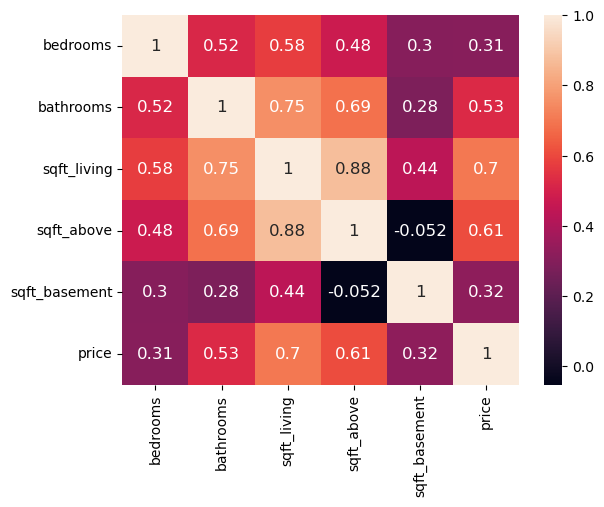

In [61]:
# generate correlation matrix with good looking visualization
corr = data.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values , annot=True, annot_kws={'size':12})


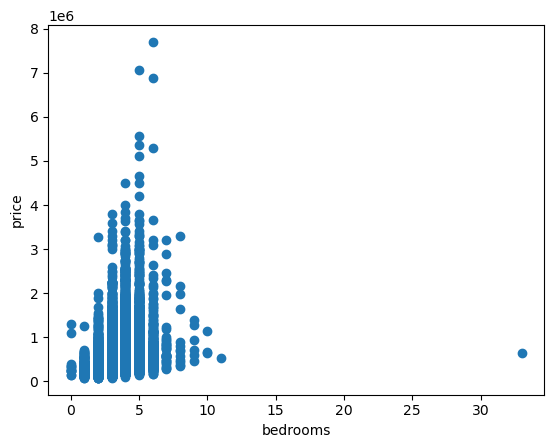

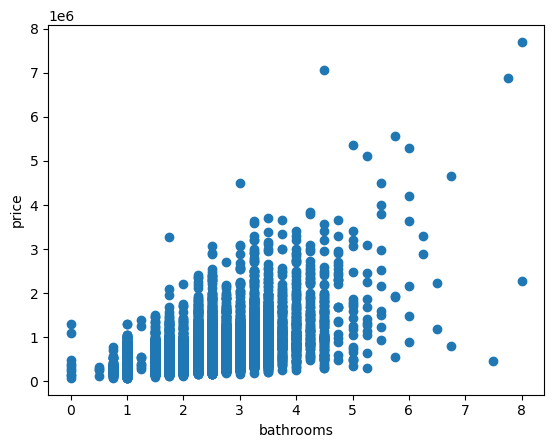

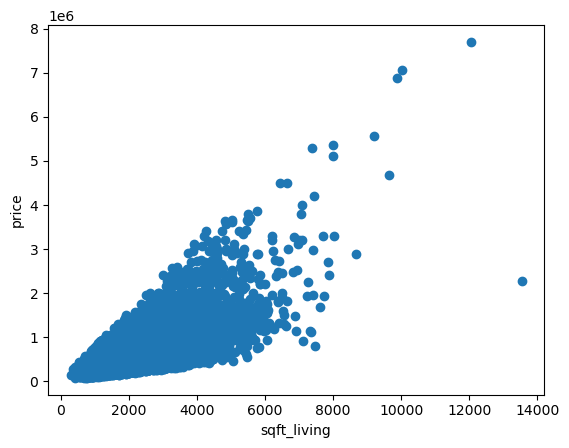

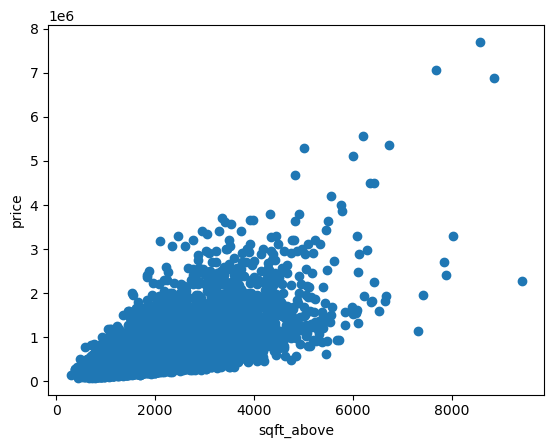

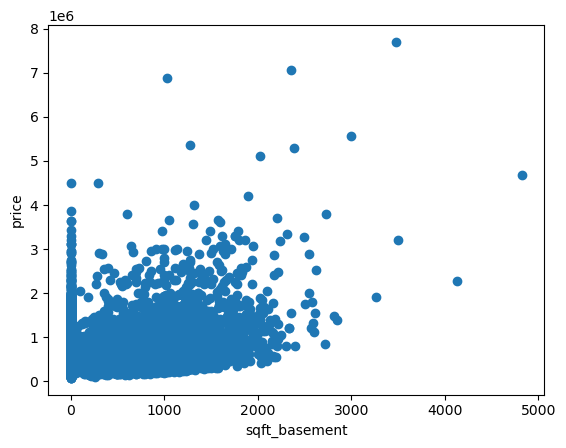

In [62]:
# generate scatter plot for each other column with price
for col in data.columns:
    if col != 'price':
        plt.scatter(data[col], data['price'])
        plt.xlabel(col)
        plt.ylabel('price')
        plt.show() 

In [63]:
# remove outliers
data = data[data['sqft_basement'] > 50]


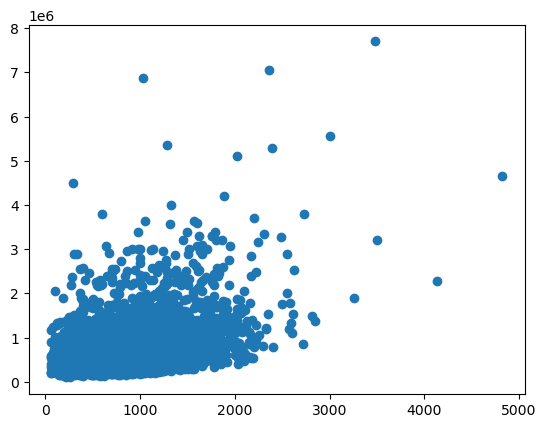

In [64]:
plt.scatter(data['sqft_basement'], data['price'])

In [83]:
class MultipleLinearRegression:
    def __init__(self, lr = 0.01, epochs = 1000):
        self.slope = None
        self.intercept = np.random.randn(1)
        self.lr = lr
        self.epochs = epochs
        
    def predict(self, X):
        if self.slope is None:
            self.slope = np.random.randn(X.shape[1]) 
        return np.dot(X, self.slope) + self.intercept
    
    def fit(self, X, y, plot = False):
        if self.slope is None:
            self.slope = np.random.randn(X.shape[1]) 
        for i in range(self.epochs):
            error = 0
            d_slope = np.random.randn(X.shape[1])
            d_intercept = 0 
            
            for j in range(len(X)):
                y_pred = self.predict(X[j])
                error += (y_pred - y[j])**2
                
                d_slope += 2 * X[j] * (y_pred - y[j])
                d_intercept += 2 * (y_pred - y[j]) 
                
            error = error / len(X)
            d_slope = d_slope / len(X)
            d_intercept = d_intercept / len(X)
            
            if  i % 100 == 0:
                print(f"Error at {i} epoch is {error}")
                print(f"Slope at {i} epoch is {self.slope}")
                print(f"Intercept at {i} epoch is {self.intercept}")
                
                if plot:
                    # plt.scatter(X, y)
                    # plt.plot(X, self.predict(X), color = 'red')
                    # plt.show() 
                    pass
            
            self.slope -=  self.lr * d_slope
            self.intercept = self.intercept - self.lr * d_intercept
    
            
            
          
                


In [84]:
X_train = np.array(data.drop('price', axis = 1).values)

In [85]:
y_train = np.array(data['price'].values)

In [86]:
model = MultipleLinearRegression(lr = 0.0000000001, epochs = 1000)
model.fit(X_train, y_train, plot = True)
model.predict(X_train)

Error at 0 epoch is [5.79e+11]
Slope at 0 epoch is [-1.12  0.53 -0.11  1.52  0.57]
Intercept at 0 epoch is [-0.72]
Error at 100 epoch is [4.22e+11]
Slope at 100 epoch is [-1.08  0.56 31.42 23.38 10.25]
Intercept at 100 epoch is [-0.71]
Error at 200 epoch is [3.17e+11]
Slope at 200 epoch is [-1.05  0.59 57.32 41.38 18.14]
Intercept at 200 epoch is [-0.7]
Error at 300 epoch is [2.45e+11]
Slope at 300 epoch is [-1.02  0.61 78.58 56.21 24.57]
Intercept at 300 epoch is [-0.69]
Error at 400 epoch is [1.97e+11]
Slope at 400 epoch is [-1.    0.62 96.04 68.44 29.81]
Intercept at 400 epoch is [-0.68]
Error at 500 epoch is [1.64e+11]
Slope at 500 epoch is [ -0.98   0.63 110.36  78.52  34.05]
Intercept at 500 epoch is [-0.68]
Error at 600 epoch is [1.42e+11]
Slope at 600 epoch is [ -0.97   0.64 122.12  86.84  37.48]
Intercept at 600 epoch is [-0.68]
Error at 700 epoch is [1.27e+11]
Slope at 700 epoch is [ -0.95   0.65 131.77  93.72  40.25]
Intercept at 700 epoch is [-0.67]
Error at 800 epoch is [1

array([ 642068.5 ,  451920.62, 1311258.93, ..., 1162041.74,  854216.01,
        331890.19])

In [88]:
print(model.slope)
print(model.intercept)

[ -0.93   0.67 151.49 108.05  45.65]
[-0.67]


In [124]:
random_index = np.random.randint(0, len(X_train))

print(model.predict(X_train[random_index]))
print(y_train[random_index])

[365901.5]
245000.0
